Decision tree GS running...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Estimator's Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 8, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Cross validation with best grid search hyperparameters: 0.8726442307692308
Fold 1 accuracy: 0.8769230769230769
Fold 2 accuracy: 0.8769230769230769
Fold 3 accuracy: 0.875
Fold 4 accuracy: 0.828125
Fold 5 accuracy: 0.90625
Average accuracy: 0.8726442307692308


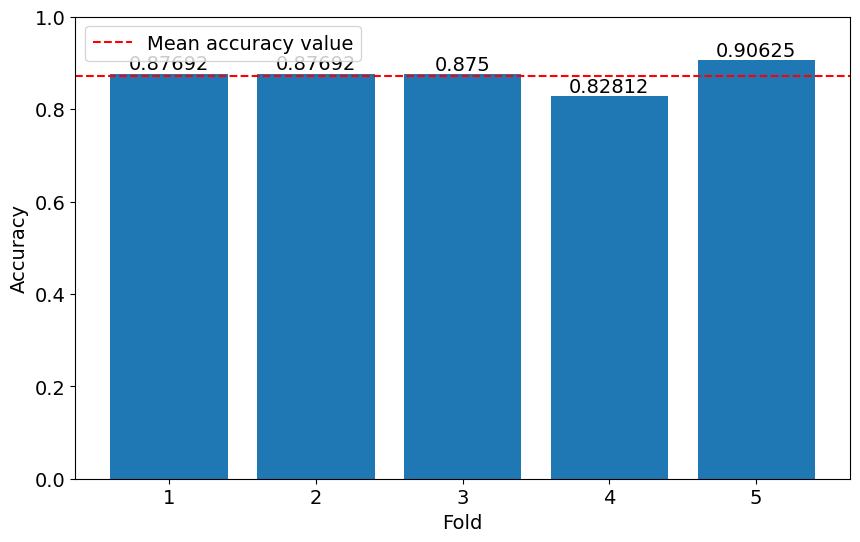

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from vc.dt.main import DecisionTreeVC
from vc.seqcov.main import SequentialCoveringVC
from vc.rf.main import RandomForestVC
from vc.ml_p.main import MLPVC

output_folder = './report_test/mgmt_test'

data = pd.read_csv(f'{output_folder}/data_norm.csv')
labels, X_labels, y_labels = data.columns.to_list(), data.columns.to_list()[:-1], [data.columns.to_list()[-1]]
X, y = data.iloc[:, :-1], data.iloc[:, -1]

X_train_pd, X_test_pd, y_train_pd, y_test_pd = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_test, y_train, y_test = X_train_pd.to_numpy(), X_test_pd.to_numpy(), y_train_pd.to_numpy(), y_test_pd.to_numpy()

clf1 = MLPVC(output_folder + '/MLP', smote=False, n_splits=5, verbose=True)
clf2 = RandomForestVC(output_folder + '/RF')
clf3 = SequentialCoveringVC(X_labels, y_labels, output_folder + '/SEQCOV')
clf4 = DecisionTreeVC(output_folder + '/DT')


# clf1.fit(X_train, y_train)
# clf2.fit(X_train, y_train)
# clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)

In [2]:
from explainer import Explainer as e

exp = e(clf4.classifier, X_train, y_train, list(X_train_pd.columns), save_folder=f'{output_folder}/EXP', verbose=True)


shap:WARNING: Using 322 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

Shap values for [[0.58250192 0.27555319 0.         0.69122807 0.32963843 0.25
  0.22222222 1.         0.23076923 0.         1.         0.
  0.         0.         0.         0.         0.7593985  0.31612903
  0.45889387 0.         0.         0.         0.01643836 0.
  0.         0.5        0.         1.         1.         0.5
  0.         0.         0.         0.         0.         0.
  0.         0.        ]]: [[ 0.          0.          0.          0.          0.          0.
   0.          0.         -0.39561566  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.07263429  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]


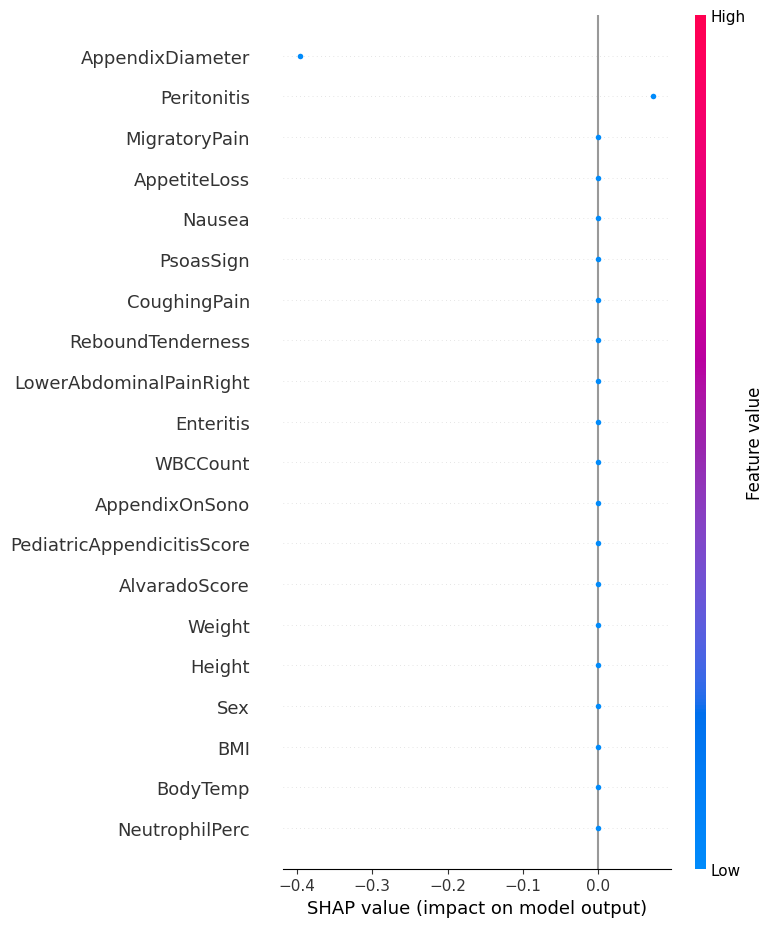

In [3]:

# exp.generate_fi()
exp.generate_shap(X_train[0].reshape(1, 38))

[0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0
 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1]
        Age       BMI  Sex    Height    Weight  AlvaradoScore  \
3  0.582502  0.275553  0.0  0.691228  0.329638           0.25   

   PediatricAppendicitisScore  AppendixOnSono  AppendixDiameter  \
3                    0.222222             1.0          0.230769   

   MigratoryPain  ...  Kokarde  TissuePerfusion  SurroundingTissueReaction  \
3 

shap:WARNING: Using 322 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.30337843 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.3736402  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]]


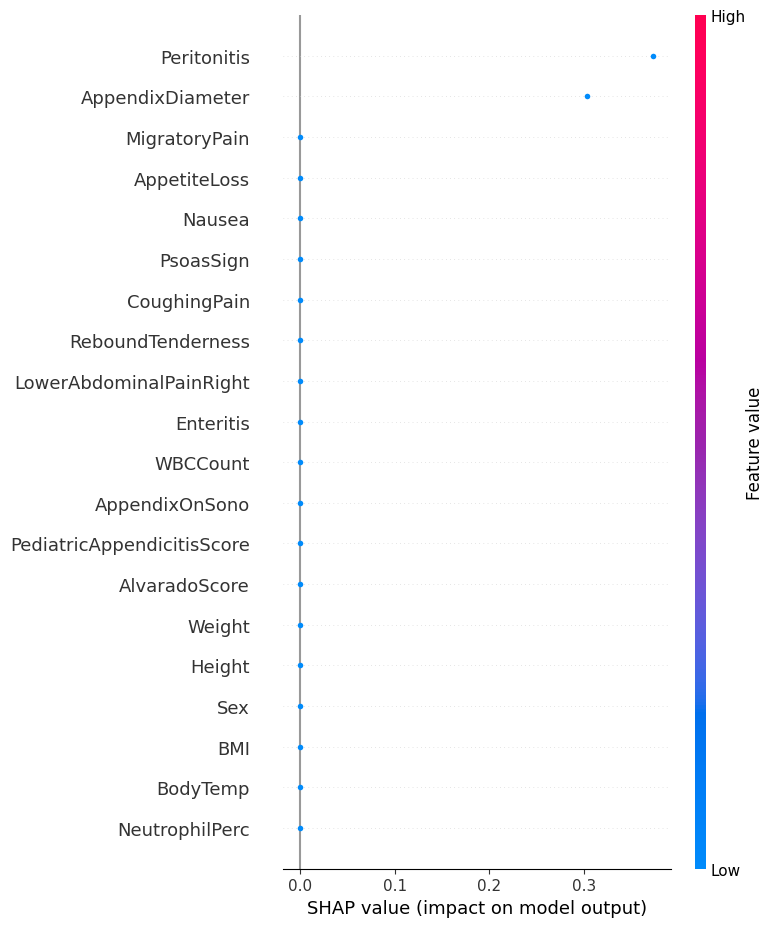

In [4]:
import shap

print(clf4.classifier.predict(X_train))
print(X_train_pd.iloc[[0]])
print(X_train[0].reshape(1, X_train.shape[1]))

shap.initjs()

explainer = shap.KernelExplainer(clf4.classifier.predict, X_train_pd.iloc[:, :], feature_names=list(X_train_pd.columns))
shap_values = explainer.shap_values(X_train[1].reshape(1, X_train.shape[1]))
print(shap_values)
shap.summary_plot(shap_values, X_train[1].reshape(1, X_train.shape[1]), feature_names=list(X_train_pd.columns))

[0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0]
[0 1]
['Age', 'BMI', 'Sex', 'Height', 'Weight', 'AlvaradoScore', 'PediatricAppendicitisScore', 'AppendixOnSono', 'AppendixDiameter', 'MigratoryPain', 'LowerAbdominalPainRight', 'ReboundTenderness', 'CoughingPain', 'PsoasSign', 'Nausea', 'AppetiteLoss', 'BodyTemp', 'WBCCount', 'NeutrophilPerc', 'KetonesInUrine', 'ErythrocytesInUrine', 'WBCInUrine', 'CRPEntry', 'Dysuria', 'Stool', 'Peritonitis', 'FreeFluids', 'AppendixWallLayers', 'Kokarde', 'TissuePerfusion', 'SurroundingTissueReaction', 'PathLymphNodes', 'MesentricLymphadenitis', 'BowelWallThick', 'Ileus', 'FecalImpaction', 'Meteorism', 'Enteritis']


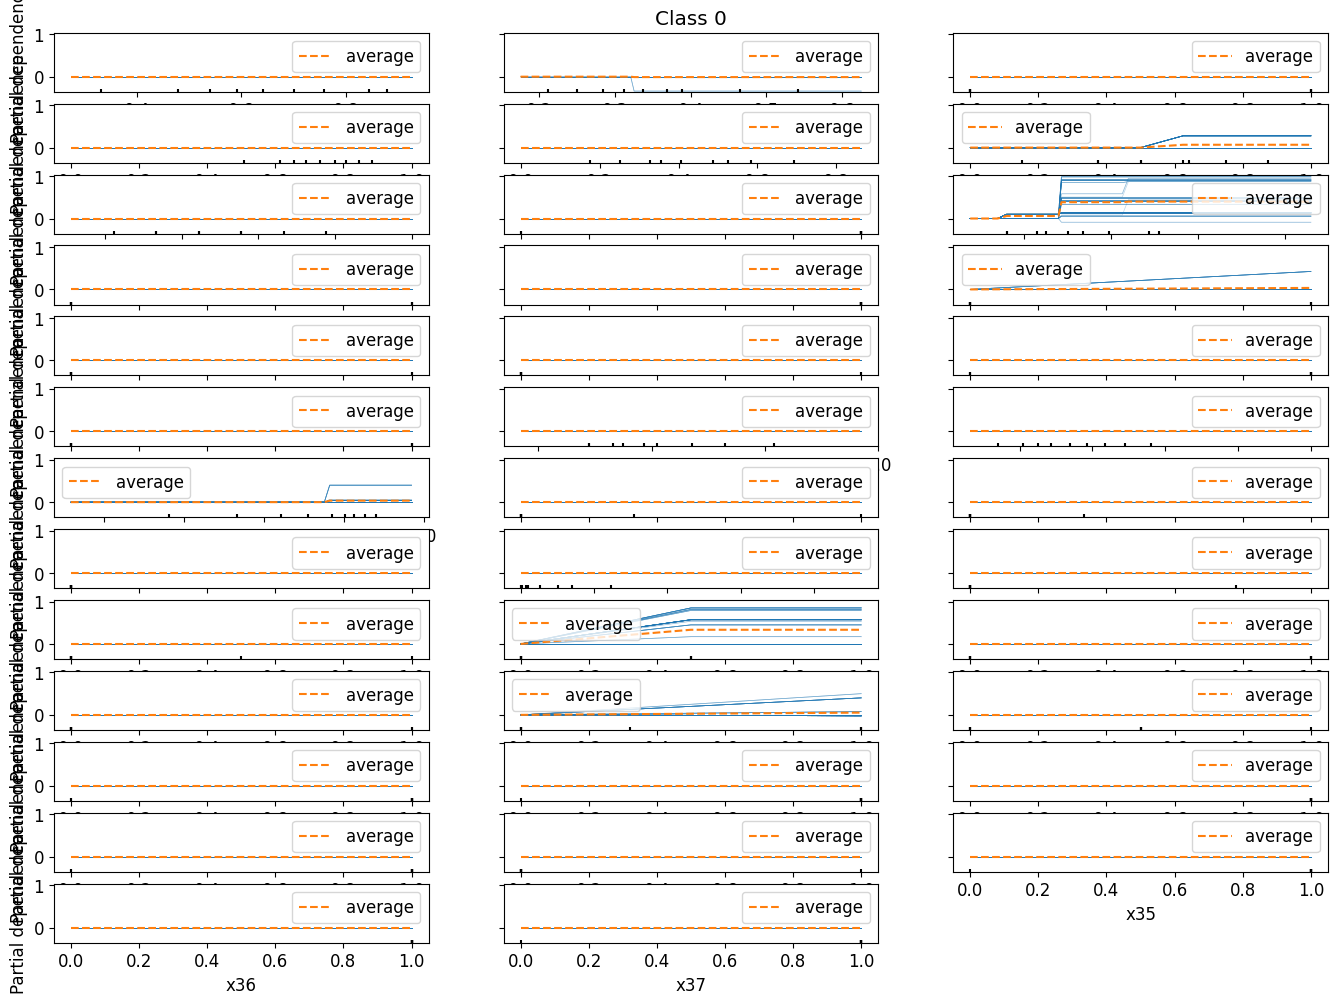

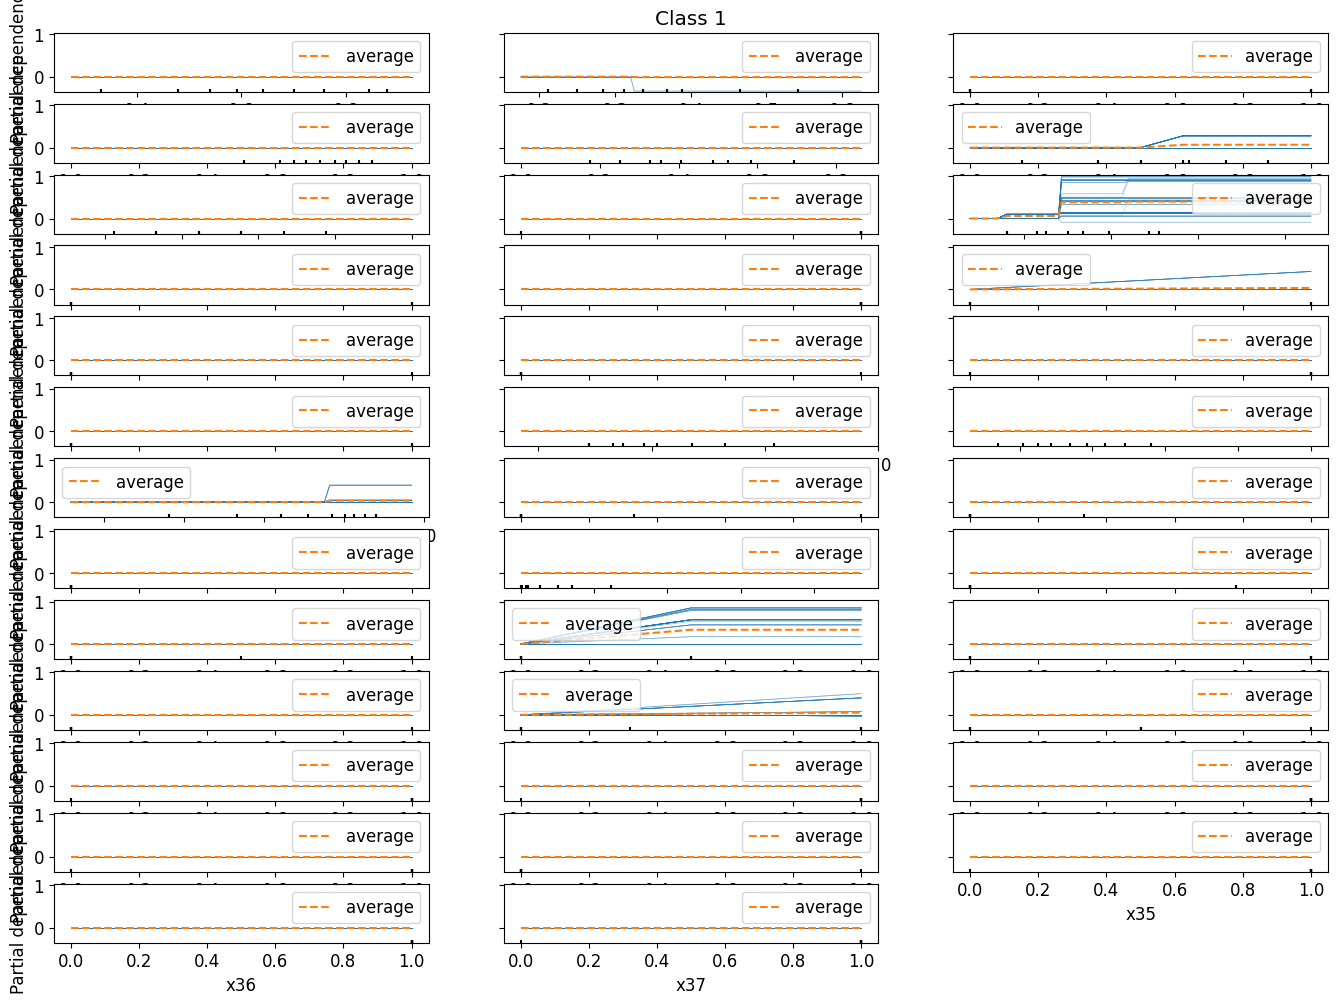

In [2]:

import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import numpy as np

print(clf4.classifier.predict(X_test))
print(clf4.classifier.classes_)
print(list(X_train_pd.columns))

for c in np.unique(y_test):
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots(figsize=(14, 10))
    plt.title(f'Class {c}')
    fig.subplots_adjust(left=0.06, right=0.97, bottom=0.06, top=0.97)
# try:
    pdp = PartialDependenceDisplay.from_estimator(
        clf4.classifier,
        X_test,
        features=[i for i in range(len(X_train_pd.columns))],
        target=c,
        method='brute',
        kind='both',
        centered=True,
        ax=ax
    )
    # save('PDP_ICE', f'_{c}')
    # except ValueError as ve:
    #     ax.text(
    #         0.5, 0.5, f'No instances classified as class {c}!', ha='center', va='center', fontsize=14)
    #     print("A ValueError occurred:", ve)
    #     # save('PDP_ICE', f'_{c}')

plt.rcParams.update({'font.size': 14})

In [ ]:
from PyALE import ale

for i, f in enumerate(X_train_pd.columns.to_list()):
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.subplots_adjust(left=0.09, right=0.96, bottom=0.06, top=0.97)
    ale_eff = ale(
        X=X_train_pd,
        model=clf1.classifier,
        feature=[f],
        grid_size=100,
        include_CI=True,
        fig=fig,
        ax=ax
    )

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

plt.figure(figsize=(12, 10))

def custom_scoring(est, X, y_true):
    return accuracy_score(y_true, est.predict(X))

results = permutation_importance(
    clf1.classifier,
    X_train,
    y_train,
    n_repeats=10,
    random_state=42,
    scoring=custom_scoring)

importance = results.importances_mean

for i, v in enumerate(importance):
    print(f'Feature {i}: {v:.5f}')

plt.subplots_adjust(left=0.09, right=0.96, bottom=0.33, top=0.97)

plt.bar(X_test_pd.columns, importance)
plt.xticks(rotation=90)
plt.ylabel('Importance')